# <font color='red'><b>Bootstrap assignment</b> </font>

<b>There will be some functions that start with the word "grader" ex: grader_sampples(), grader_30().. etc, you should not change those function definition.

Every Grader function has to return True.</b>

<font color='blue'> <b>Importing packages</b> </font>

In [1]:
import numpy as np # importing numpy for numerical computation
from sklearn.datasets import load_boston # here we are using sklearn's boston dataset
from sklearn.metrics import mean_squared_error # importing mean_squared_error metric

In [2]:
boston = load_boston()
x=boston.data #independent variables
y=boston.target #target variable

/home/ubuntu/.local/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing data

In [3]:
x.shape

(506, 13)

In [4]:
x[:5]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

## <font color='red'><b>Task 1</b></font>

<font color='red'> <b>Step - 1</b></font>

*  <font color='blue'><b>Creating samples</b></font><br>
    <b> Randomly create 30 samples from the whole boston data points</b>
    *  Creating each sample: Consider any random 303(60% of 506) data points from whole data set and then replicate any 203 points from the sampled points
    
     For better understanding of this procedure lets check this examples, assume we have 10 data points [1,2,3,4,5,6,7,8,9,10], first we take 6 data points randomly , consider we have selected [4, 5, 7, 8, 9, 3] now we will replicate 4 points from [4, 5, 7, 8, 9, 3], consder they are [5, 8, 3,7] so our final sample will be [4, 5, 7, 8, 9, 3, 5, 8, 3,7]
* <font color='blue'><b> Create 30 samples </b></font>
    *  Note that as a part of the Bagging when you are taking the random samples <b>make sure each of the sample will have different set of columns</b><br>
Ex: Assume we have 10 columns[1 ,2 ,3 ,4 ,5 ,6 ,7 ,8 ,9 ,10] for the first sample we will select [3, 4, 5, 9, 1, 2] and for the second sample  [7, 9, 1, 4, 5, 6, 2] and so on...
Make sure each sample will have atleast 3 feautres/columns/attributes

* <font color='red'><b> Note - While selecting the random 60% datapoints from the whole data, make sure that the selected datapoints are all exclusive, repetition is not allowed. </b></font>

<font color='red'><b>Step - 2 </b></font>

<font color='blue'><b>Building High Variance Models on each of the sample and finding train MSE value</b></font>

*  Build a regression trees on each of 30 samples.
*  Computed the predicted values of each data point(506 data points) in your corpus.
*  Predicted house price of $i^{th}$ data point $y^{i}_{pred} =  \frac{1}{30}\sum_{k=1}^{30}(\text{predicted value of } x^{i} \text{ with } k^{th} \text{ model})$
*  Now calculate the $MSE =  \frac{1}{506}\sum_{i=1}^{506}(y^{i} - y^{i}_{pred})^{2}$

<font color='red'> <b>Step - 3 </b></font>

*  <font color='blue'><b>Calculating the OOB score </b></font>

*  Predicted house price of $i^{th}$ data point $y^{i}_{pred} =  \frac{1}{k}\sum_{\text{k= model which was buit on samples not included } x^{i}}(\text{predicted value of } x^{i} \text{ with } k^{th} \text{ model})$.
*  Now calculate the $OOB Score =  \frac{1}{506}\sum_{i=1}^{506}(y^{i} - y^{i}_{pred})^{2}$.

# <font color='red'><b>Task 2</b></font>

*  <font color='blue'><b>Computing CI of OOB Score and Train MSE</b></font>
  *   Repeat Task 1 for 35 times, and for each iteration store the Train MSE and OOB score </li>
<li> After this we will have 35 Train MSE values and 35 OOB scores </li>
<li> using these 35 values (assume like a sample) find the confidence intravels of MSE and OOB Score </li>
<li> you need to report CI of MSE and CI of OOB Score </li>
<li> Note: Refer the Central_Limit_theorem.ipynb to check how to find the confidence intravel</li>
</ol>

# <font color='red'><b>Task 3</b></font>

*  <font color='blue'><b>Given a single query point predict the price of house.</b></font>

Consider xq= [0.18,20.0,5.00,0.0,0.421,5.60,72.2,7.95,7.0,30.0,19.1,372.13,18.60] 
Predict the house price for this point as mentioned in the step 2 of Task 1.

## <font color='red'><b>A few key points</b></font>

* Remember that the datapoints used for calculating MSE score contain some datapoints that were initially used while training the base learners (the 60% sampling). This makes these datapoints partially seen (i.e. the datapoints used for calculating the MSE score are a mixture of seen and unseen data).
Whereas, the datapoints used for calculating OOB score have only the unseen data. This makes these datapoints completely unseen and therefore appropriate for testing the model's performance on unseen data.

* Given the information above, if your logic is correct, the calculated MSE score should be less than the OOB score.

* The MSE score must lie between 0 and 10.
* The OOB score must lie between 10 and 35.

* The difference between the left nad right confidence-interval values must not be more than 10. Make sure this is true for both MSE and OOB confidence-interval values.

# <font color='blue'> <b>Task - 1</b></font>

<font color='blue'><b>Step - 1</b></font>

*  <font color='blue'> <b>Creating samples</b></font>

<font color='Orange'><b>Algorithm</b></font>

![alt text](https://i.imgur.com/OfcFrUP.jpg/)

*  <font color='blue'><b> Write code for generating samples</b></font>

In [5]:
def generating_samples(input_data, target_data):

    '''In this function, we will write code for generating 30 samples '''
    # you can use random.choice to generate random indices without replacement
    # Please have a look at this link https://docs.scipy.org/doc/numpy-1.16.0/reference/generated/numpy.random.choice.html for more details
    # Please follow above pseudo code for generating samples
    temp=np.arange(0,len(input_data)) 
    selected_rows=list(np.random.choice(temp,size=int(len(input_data)*(60/100)),replace=False))
    final_rows=selected_rows+list(np.random.choice(selected_rows,size=len(input_data)-len(selected_rows)))
    temp=np.arange(0,len(input_data[0]))
    selected_columns=list(np.random.choice(temp,size=np.random.randint(3,14),replace=False))
    sampled_input_data=input_data.T[selected_columns].T[final_rows]
    sampled_target_data=target_data[final_rows]
    return list(sampled_input_data),list(sampled_target_data),selected_rows,selected_columns
    # return sampled_input_data , sampled_target_data,selected_rows,selected_columns
    #note please return as lists

In [6]:
a,b,c,d=generating_samples(x,y)

<font color='cyan'> <b> Grader function - 1 </b> </fongt>

In [7]:
def grader_samples(a,b,c,d):
    length = (len(a)==506  and len(b)==506)
    sampled = (len(a)-len(set([str(i) for i in a]))==203)
    rows_length = (len(c)==303)
    column_length= (len(d)>=3)
    assert(length and sampled and rows_length and column_length)
    return True
a,b,c,d = generating_samples(x, y)
grader_samples(a,b,c,d)

True

*  <font color='blue'> <b>Create 30 samples </b>

![alt text](https://i.imgur.com/p8eZaWL.jpg)

In [8]:
# Use generating_samples function to create 30 samples 
# store these created samples in a list
list_input_data =[]
list_output_data =[]
list_selected_row= []
list_selected_columns=[]
for i in range(30):
  a,b,c,d=generating_samples(x,y)
  list_input_data.append(a)
  list_output_data.append(b)
  list_selected_row.append(c)
  list_selected_columns.append(d)

<font color='cyan'> <b>Grader function - 2 </b></font>

In [9]:
def grader_30(a):
    assert(len(a)==30 and len(a[0])==506)
    return True
grader_30(list_input_data)

True

<br>

<font color='red'><b>Step - 2 </b></font>

<font color='orange'><b>Flowchart for building tree</b></font>

![alt text](https://i.imgur.com/pcXfSmp.png)

*  <font color='blue'><b> Write code for building regression trees</b></font>

In [10]:
x.T[list_selected_columns[i]].T[list_selected_row[i]].shape,

((303, 11),)

In [11]:
from sklearn.tree import DecisionTreeRegressor
list_all_models=[]
for i in range(len(list_input_data)):
  model=DecisionTreeRegressor()
  #model.fit(list_input_data[i],list_output_data[i])
  model.fit(x.T[list_selected_columns[i]].T[list_selected_row[i]],y[list_selected_row[i]])
  list_all_models.append(model)
print(len(list_all_models))

30


<font color='orange'><b>Flowchart for calculating MSE </b></font>

![alt text](https://i.imgur.com/sPEE618.png)

After getting predicted_y for each data point, we can use sklearns mean_squared_error to calculate the MSE between predicted_y and actual_y.

*  <font color='blue'><b> Write code for calculating MSE</b></font>

In [12]:
#list_all_models[0].predict([list(range(0,12))])

In [13]:
predict_values=[]
for i in range(len(list_all_models)):
  predict_values.append(list_all_models[i].predict(x.T[list_selected_columns[i]].T))
#predict=sum(predict_values)/len(list_all_models)
predict=np.median(predict_values,axis=0)

In [14]:
predict.shape

(506,)

In [15]:
mse=mean_squared_error(y,predict)
print("mean square error is {}".format(mse))

mean square error is 0.08378242341897237


<font color='blue'><b>Step - 3 </b></font>

<font color='orange'><b>Flowchart for calculating OOB score</b></font>

![alt text](https://i.imgur.com/95S5Mtm.png)

Now calculate the $OOB Score =  \frac{1}{506}\sum_{i=1}^{506}(y^{i} - y^{i}_{pred})^{2}$.

*  <font color='blue'><b> Write code for calculating OOB score </b></font>

In [16]:
oob_score=[]
for i in range(len(x)):
    predict_oob=[]
    for j in range(len(list_all_models)):
        if i not in list_selected_row[j]:
            predict_oob.append(list_all_models[j].predict(x[i].reshape(1,-1).T[list_selected_columns[j]].T)[0])
    oob_score.append(np.median(predict_oob))
#print("length of obb_score {}".format(len(oob_score)))
print("oob_score is : {}".format(mean_squared_error(y,oob_score)))

oob_score is : 14.05271959569556


# <font color='blue'><b>Task 2</b></font>

In [17]:
def task1(x,y,n): #n number of times
    mse_sample=[]
    oob_sample=[]
    for k in range(n):

        list_input_data =[]
        list_output_data =[]
        list_selected_row= []
        list_selected_columns=[]
        for i in range(30):
          a,b,c,d=generating_samples(x,y)
          list_input_data.append(a)
          list_output_data.append(b)
          list_selected_row.append(c)
          list_selected_columns.append(d)
        list_all_models=[]
        for i in range(len(list_input_data)):
          model=DecisionTreeRegressor()
          model.fit(list_input_data[i],list_output_data[i])
          #model.fit(x.T[list_selected_columns[i]].T[list_selected_row[i]],y[list_selected_row[i]])
          list_all_models.append(model)
        #print(len(list_all_models))
        predict_values=[]
        for i in range(len(list_all_models)):
          predict_values.append(list_all_models[i].predict(x.T[list_selected_columns[i]].T))
        #predict=sum(predict_values)/len(list_all_models)
        predict=np.median(predict_values,axis=0)
        mse=mean_squared_error(y,predict)
        mse_sample.append(mse)
        oob_score=[]
        for i in range(len(x)):
            predict_oob=[]
            for j in range(len(list_all_models)):
                if i not in list_selected_row[j]:
                    predict_oob.append(list_all_models[j].predict(x[i].reshape(1,-1).T[list_selected_columns[j]].T)[0])
            oob_score.append(np.median(predict_oob))
        oob=mean_squared_error(y,oob_score)
        oob_sample.append(oob)
    return mse_sample,oob_sample

In [18]:
mse_sample,oob_sample=task1(x,y,35)

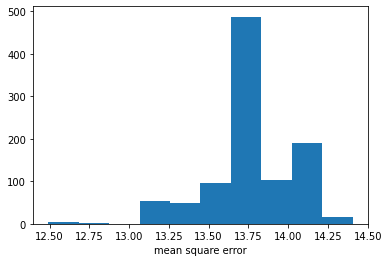

95.0 confidence interval 13.2 and 14.2


In [20]:
# code taken from applied ai course 
import numpy
from pandas import read_csv
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
t = np.array(oob_sample)

# configure bootstrap
n_iterations = 1000
n_size = int(len(t))

# run bootstrap
medians = list()
for i in range(n_iterations):
    # prepare train and test sets
    s = resample(t, n_samples=n_size);
    m = numpy.median(s);
    #print(m)
    medians.append(m)

# plot scores
pyplot.hist(medians)
pyplot.xlabel('mean square error')
pyplot.show()

# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower =  numpy.percentile(medians, p)

p = (alpha+((1.0-alpha)/2.0)) * 100
upper =  numpy.percentile(medians, p)
print('%.1f confidence interval %.1f and %.1f' % (alpha*100, lower, upper))

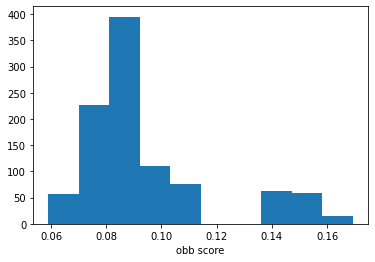

95.0 confidence interval 0.1 and 0.2


In [21]:
# code taken from applied ai course 
import numpy
from pandas import read_csv
from sklearn.utils import resample
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
t = np.array(mse_sample)

# configure bootstrap
n_iterations = 1000
n_size = int(len(t))

# run bootstrap
medians = list()
for i in range(n_iterations):
    # prepare train and test sets
    s = resample(t, n_samples=n_size);
    m = numpy.median(s);
    #print(m)
    medians.append(m)

# plot scores
pyplot.hist(medians)
pyplot.xlabel('obb score')
pyplot.show()

# confidence intervals
alpha = 0.95
p = ((1.0-alpha)/2.0) * 100
lower =  numpy.percentile(medians, p)

p = (alpha+((1.0-alpha)/2.0)) * 100
upper =  numpy.percentile(medians, p)
print('%.1f confidence interval %.1f and %.1f' % (alpha*100, lower, upper))


# <font color='blue'><b>Task 3</b></font>

<font color='orange'><b>Flowchart for Task 3</b></font>

<b>Hint: </b> We created 30 models by using 30 samples in TASK-1. Here, we need send query point "xq"  to 30 models and perform the regression on the output generated by 30 models.

![alt text](https://i.imgur.com/Y5cNhQk.png)

*  <font color='blue'><b> Write code for TASK 3 </b></font>

In [22]:
pred_yq=[]
xq= np.array([0.18,20.0,5.00,0.0,0.421,5.60,72.2,7.95,7.0,30.0,19.1,372.13,18.60]).reshape(1,-1)
for i in range(len(list_all_models)):
  pred_yq.append(list_all_models[i].predict(xq.T[list_selected_columns[i]].T)[0])
print('predicted value for xq is : {}'.format(np.median(pred_yq)))

predicted value for xq is : 18.5


<font color='red'><b>Write observations for task 1, task 2, task 3 indetail</b></font>

# Observation :
 1 . mean square error is 0.08

 2 . oob_score is : 14.05

 3 . mse , 95.0 confidence interval 13.2 and 14.2
 
 4 . obb score ,95.0 confidence interval 0.1 and 0.2

 5 . predicted value for xq is : 18.5
